# Assignemnt 1

Question:1

Suppose that you are conducting a scientific experiment where you are observing the effects of one variable (x_train.npy and x_test.npy) on the output (y_train.npy and y_test.npy).

Mounted at /content/gdrive/
theta: [ 6.00000000e+00  1.00000000e+01 -5.95412608e-13 -8.00000000e+00
  9.46465128e-15  1.00000000e+00]
the model is: y =  6.000000000003773  +  10.000000000020057 * X^1 +  -5.954126081064715e-13 * X^2 +  -8.000000000007942 * X^3 +  9.46465128492946e-15 * X^4 +  1.0000000000006786 * X^5


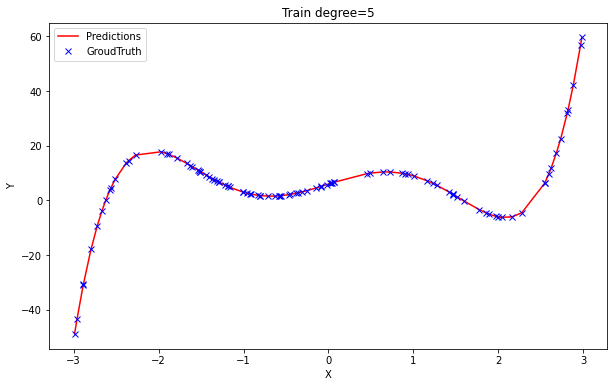

Degree: 5  Mean squared error: 6.34369701274719e-23


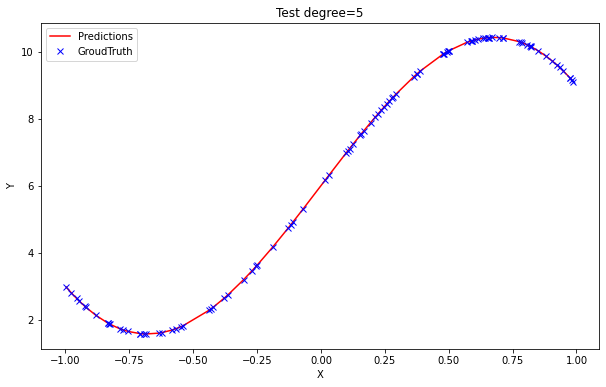

Degree: 5  Mean squared error: 23.975757680228778
theta: [ 3.07438952 -8.86005275  0.9152175   2.14780577 -0.06736536]


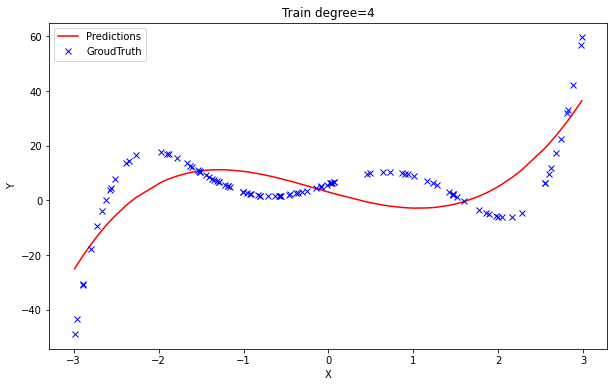

Degree: 4  Mean squared error: 80.90354598712582


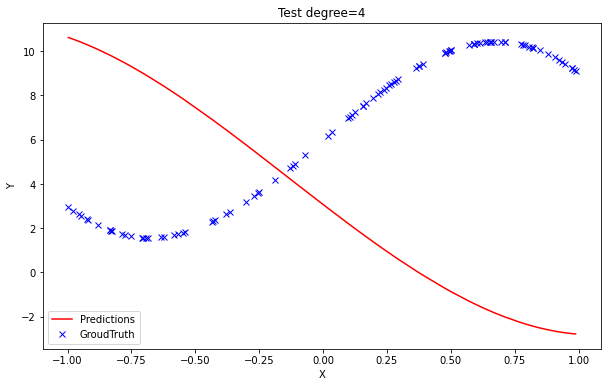

Degree: 4  Mean squared error: 50.583894525348875
theta: [ 3.57885071 -8.8662175   0.3668197   2.14852558]


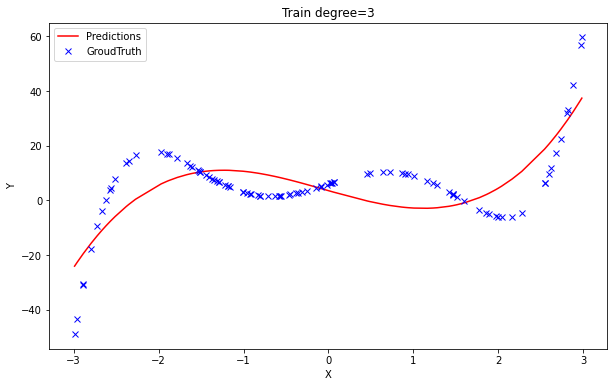

Degree: 3  Mean squared error: 81.07774145765357


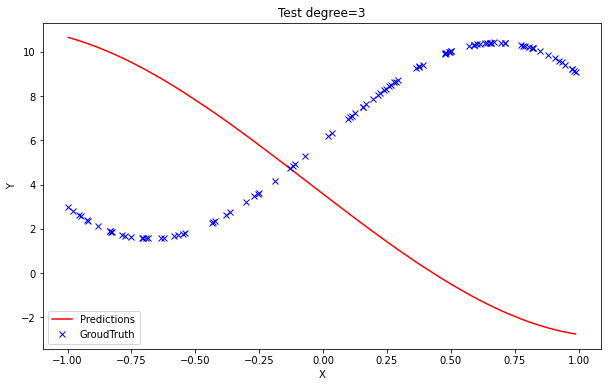

Degree: 3  Mean squared error: 48.08218995338271
theta: [ 6.25537076  3.3082094  -0.02087222]


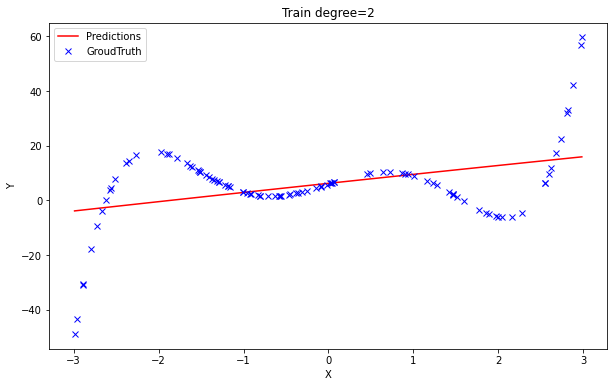

Degree: 2  Mean squared error: 169.33131794384346


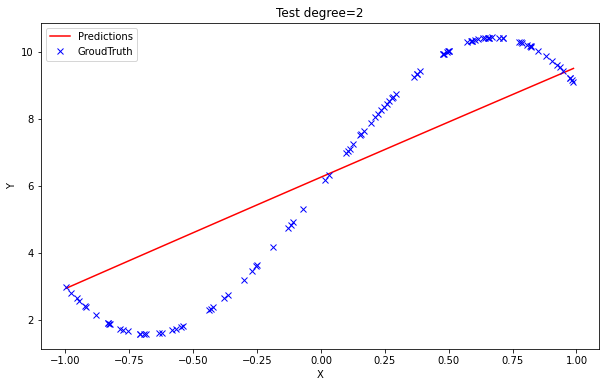

Degree: 2  Mean squared error: 16.086759826700007
theta: [6.19321416 3.30656683]


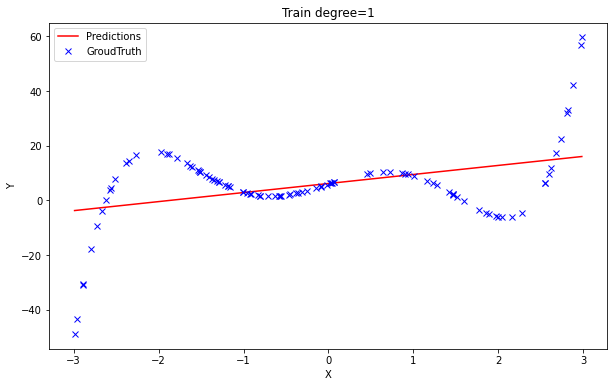

Degree: 1  Mean squared error: 169.33472639737593


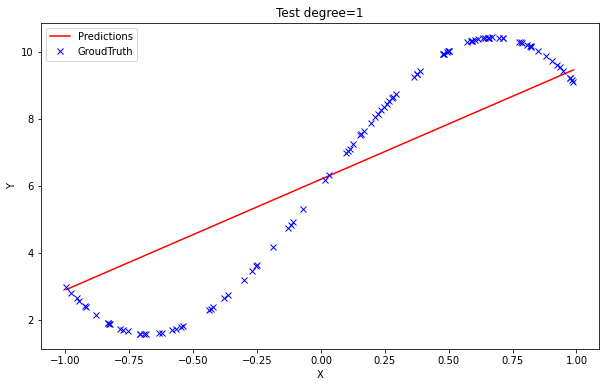

Degree: 1  Mean squared error: 16.10104717579837
--------------------------------------------------------
y =  6.000000000003773  +  10.000000000020057 * X^1 +  -5.954126081064715e-13 * X^2 +  -8.000000000007942 * X^3 +  9.46465128492946e-15 * X^4 +  1.0000000000006786 * X^5


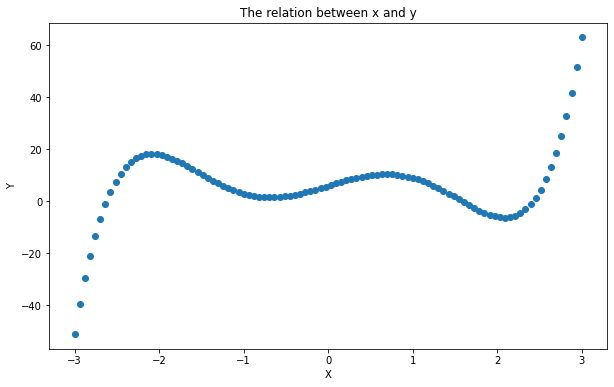

In [28]:
# Read files 
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]


def polynomial_regression(degree = 5):
  x_train = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/x_train.npy')
  x_test = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/x_test.npy')

  y_train = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/y_train.npy')
  y_test = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/y_test.npy')

  xArr ,yArr = x_train, y_train

  list1, list2 = sorting(xArr[:,0],yArr)

  xArr = np.array(list1).reshape(-1,1)
  yArr = np.array(list2)

  X = xArr
  y = yArr

  m, n = X.shape

  # Add a bias factor to X.
  X = np.hstack((np.ones((m, 1)), X))

  if degree == 5:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
        (X[:, 1] ** 5).reshape((m, 1))
    ))
  elif degree == 4:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
    ))
  elif degree == 3:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
    ))
  elif degree == 2:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
    ))
  elif degree == 1:
    X = X

  def h(X, theta):
    # another way return np.dot(X,  theta) 
    return X @ theta


  # Normal Equation
  theta = np.linalg.pinv(X.T @ X) @ X.T @ y


  predictions = h(X, theta)

  print('theta:', theta)
  if degree == 5:
    print('the model is: y = ', theta[0], ' + ', theta[1], '* X^1 + ', theta[2], '* X^2 + ', theta[3], '* X^3 + ', theta[4], '* X^4 + ', theta[5], '* X^5')

  plt.figure(figsize=(10, 6))
  plt.title('Train degree=' +str(degree))
  plt.plot(X[:, 1], predictions, label='Predictions', c='r')
  plt.plot(X[:, 1], y, 'bx', label='GroudTruth')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.show()

  print("Degree:", degree, " Mean squared error:", np.average((y - predictions) ** 2))


  # Test
  xArr ,yArr = x_test, y_test
  list1, list2 = sorting(xArr[:,0],yArr)
  xArr = np.array(list1).reshape(-1,1)
  yArr = np.array(list2)

  y = yArr
  X = xArr  

  # plt.figure(figsize=(10, 6))
  # plt.scatter(X, y)
  # plt.title("Test data");

  # Add a bias factor to X.
  m, n = X.shape
  X = np.hstack((np.ones((m, 1)), X))

  if degree == 5:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
        (X[:, 1] ** 5).reshape((m, 1))
    ))
  elif degree == 4:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
    ))
  elif degree == 3:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
    ))
  elif degree == 2:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
    ))
  elif degree == 1:
    X = X

  plt.figure(figsize=(10, 6))
  plt.title('Test degree=' +str(degree))
  predictions = h(X, theta)
  plt.plot(X[:, 1], predictions, label='Predictions', c='r')
  plt.plot(X[:, 1], y, 'bx', label='GroudTruth')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.show()

  print("Degree:", degree, " Mean squared error:", np.average((y - predictions) ** 2))


#########################################
polynomial_regression(degree=5)
polynomial_regression(degree=4)
polynomial_regression(degree=3)
polynomial_regression(degree=2)
polynomial_regression(degree=1)

# the model is: y =  6.000000000003773 +  10.000000000020057 * X^1 +  -5.954126081064715e-13 * X^2 +  -8.000000000007942 * X^3 +  9.46465128492946e-15 * X^4 +  1.0000000000006786* X^5
print("--------------------------------------------------------")
n = 100
X = np.linspace(-3, 3, n)
Y = 6.000000000003773 * 1 +  10.000000000020057 * X**1 +  -5.954126081064715e-13 * X**2 +  -8.000000000007942 * X**3 +  9.46465128492946e-15 * X**4 +  1.0000000000006786 * X**5

print("y =  6.000000000003773  +  10.000000000020057 * X^1 +  -5.954126081064715e-13 * X^2 +  -8.000000000007942 * X^3 +  9.46465128492946e-15 * X^4 +  1.0000000000006786 * X^5")
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
# plt.plot(xs_new, preds, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("The relation between x and y");



Question 2

Imagine that you are a realtor in Stillwater. You have data points that correspond to the recent sales of different houses in and around Stillwater. Your goal is to help estimate the prices of houses that one can use to sell or buy listings. Can you use your knowledge of linear regression to find the best regression model? Use your implementation from Question 1 (without any basis functions) to answer the following questions.

Mounted at /content/gdrive/
   Local Price  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
0       4.9176        1.0      3.472        0.998        1.0        7   
2       4.5429        1.0      2.275        1.175        1.0        6   
5       3.8910        1.0      4.455        0.988        1.0        6   
7       5.6039        1.0      9.520        1.501        0.0        6   
8      16.4202        2.5      9.800        3.420        2.0       10   

   # Bedrooms  Age of home  Construction type  Architecture type  \
0           4           42                  3                  1   
2           3           40                  2                  1   
5           3           56                  2                  1   
7           3           32                  1                  1   
8           5           42                  2                  1   

   # Fire places  
0              0  
2              0  
5              0  
7              0  
8              1  
x shape in

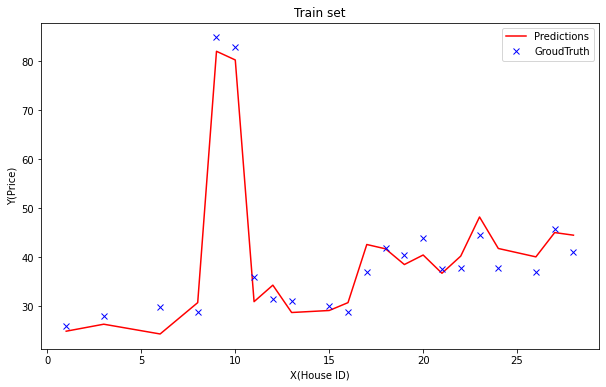

Degree: 1 Train set Mean squared error: 9.136091262322154
predictions: [31.70163019 28.90636121 27.46043756 31.25670446 30.53085249 47.20952784]


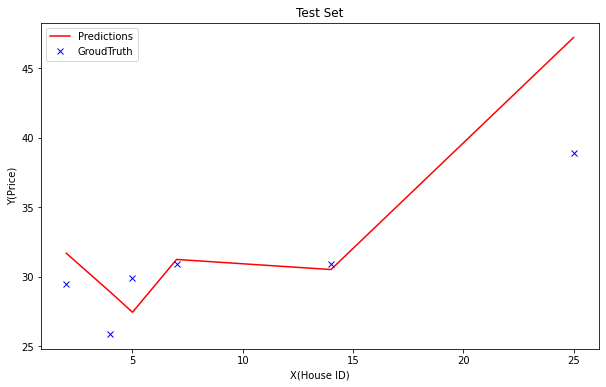

Degree: 1 Testset Mean squared error: 14.858101484680768


In [44]:
# Read files and load data
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]


def polynomial_regression(x_train, y_train, x_test, y_test, degree = 5, train_axis_x_value = [], test_axis_x_value = []):

  xArr ,yArr = x_train, y_train

  # list1, list2 = sorting(xArr[:,0],yArr)

  # xArr = np.array(list1).reshape(-1,1)
  # yArr = np.array(list2)

  X = xArr
  y = yArr

  m, n = X.shape

  # Add a bias factor to X.
  X = np.hstack((np.ones((m, 1)), X))

  if degree == 5:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
        (X[:, 1] ** 5).reshape((m, 1))
    ))
  elif degree == 4:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
    ))
  elif degree == 3:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
    ))
  elif degree == 2:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
    ))
  elif degree == 1:
    X = X

  print('x shape in pol :', X.shape)

  def h(X, theta):
    # another way return np.dot(X,  theta) 
    return X @ theta

  # print('X:', X)
  # Normal Equation
  theta = np.linalg.pinv(X.T @ X) @ X.T @ y

  
  predictions = h(X, theta)

  print('theta:', theta)


  plt.figure(figsize=(10, 6))
  plt.title('Train set')
  plt.plot(train_axis_x_value, predictions, label='Predictions', c='r')
  plt.plot(train_axis_x_value, y, 'bx', label='GroudTruth')
  plt.xlabel('X(House ID)')
  plt.ylabel('Y(Price)')
  plt.legend()
  plt.show()

  print("Degree:", degree, "Train set Mean squared error:", np.average((y - predictions) ** 2))

  # Test set 
  X = x_test
  y = y_test

  m, n = X.shape

  # Add a bias factor to X.
  X = np.hstack((np.ones((m, 1)), X))
  predictions = h(X, theta)

  print('predictions:', predictions)

  plt.figure(figsize=(10, 6))
  plt.title('Test Set')
  plt.plot(test_axis_x_value, predictions, label='Predictions', c='r')
  plt.plot(test_axis_x_value, y, 'bx', label='GroudTruth')
  plt.xlabel('X(House ID)')
  plt.ylabel('Y(Price)')
  plt.legend()
  plt.show()

  print("Degree:", degree, "Testset Mean squared error:", np.average((y - predictions) ** 2))


#########################################


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/Assignment1_Q2_Data.csv')

# divide dataset to train and test
msk = np.random.rand(len(dataset)) < 0.8
train_set = dataset[msk]
test_set = dataset[~msk]
# print('len df:',len(dataset))
# print('test:', test_set)

"""
LivingArea	Bedroom	Price
1643	4	256
1356	3	202
1678	3	287
3000	4	400
"""
# print(train_set.head())
# print(train_set.columns)

Train_House_ID = np.asarray(train_set.get('House ID')).reshape(-1,1)

# Local_Price = np.asarray(dataset.get('Local Price')).reshape(-1,1)
# Bathrooms = np.asarray(dataset.get('Bathrooms')).reshape(-1,1)

# Land_Area = np.asarray(dataset.get('Land Area')).reshape(-1,1)
# Living_area = np.asarray(dataset.get('Living area')).reshape(-1,1)

# Garages = np.asarray(dataset.get('# Garages')).reshape(-1,1)
# Rooms = np.asarray(dataset.get('# Rooms')).reshape(-1,1)

# Bedrooms = np.asarray(dataset.get('# Bedrooms')).reshape(-1,1)
# Age_of_home = np.asarray(dataset.get('Age of home')).reshape(-1,1)

# Construction_type = np.asarray(dataset.get('Construction type')).reshape(-1,1)
# Architecture_type = np.asarray(dataset.get('Architecture type')).reshape(-1,1)

# Fire_places = np.asarray(dataset.get('# Fire places')).reshape(-1,1)

train_set_Final_Price = np.asarray(train_set.get('Price (1000$)'))
train_set = train_set.drop("Price (1000$)", axis=1)
train_set = train_set.drop("House ID", axis=1)

# Train_House_ID = np.asarray(dataset.get('House ID')).reshape(-1,1)
# train_set_Final_Price = np.asarray(dataset.get('Price (1000$)'))
# dataset = dataset.drop("Price (1000$)", axis=1)
# dataset = dataset.drop("House ID", axis=1)
# train_set = dataset

# print(train_set.head())
print(train_set.columns)

Test_House_ID = np.asarray(test_set.get('House ID')).reshape(-1,1)
test_set_Final_Price = np.asarray(test_set.get('Price (1000$)'))
test_set = test_set.drop("Price (1000$)", axis=1)
test_set = test_set.drop("House ID", axis=1)


x_train = train_set
y_train = train_set_Final_Price

x_test = test_set
y_test = test_set_Final_Price

polynomial_regression(x_train, y_train, x_test, y_test, degree=1, train_axis_x_value = Train_House_ID, test_axis_x_value = Test_House_ID)

# Garages good





Mounted at /content/gdrive/
Index(['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages',
       '# Rooms', '# Bedrooms', 'Age of home', 'Construction type',
       'Architecture type', '# Fire places'],
      dtype='object')
x shape in pol : (17, 2)
theta: [25.03864542 11.33665339]


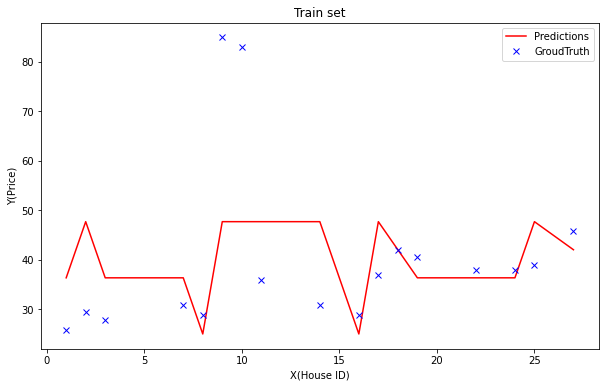

Degree: 1 Train set Mean squared error: 226.27604288727449
predictions: [36.3752988  36.3752988  36.3752988  36.3752988  36.3752988  25.03864542
 42.0436255  47.71195219 47.71195219 47.71195219 47.71195219]


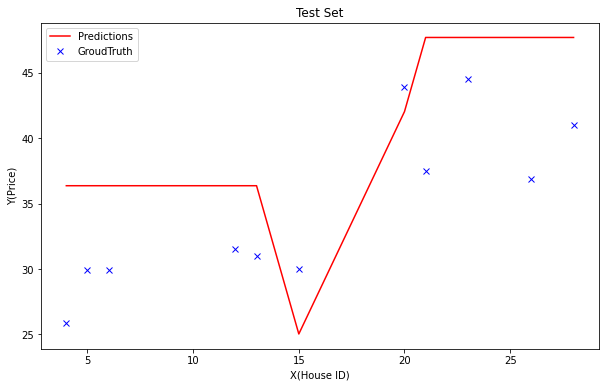

Degree: 1 Testset Mean squared error: 50.078512032998056


In [54]:
# Read files and load data
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]


def polynomial_regression(x_train, y_train, x_test, y_test, degree = 5, train_axis_x_value = [], test_axis_x_value = []):

  xArr ,yArr = x_train, y_train

  # list1, list2 = sorting(xArr[:,0],yArr)

  # xArr = np.array(list1).reshape(-1,1)
  # yArr = np.array(list2)

  X = xArr
  y = yArr

  m, n = X.shape

  # Add a bias factor to X.
  X = np.hstack((np.ones((m, 1)), X))

  if degree == 5:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
        (X[:, 1] ** 5).reshape((m, 1))
    ))
  elif degree == 4:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
    ))
  elif degree == 3:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
    ))
  elif degree == 2:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
    ))
  elif degree == 1:
    X = X

  print('x shape in pol :', X.shape)

  def h(X, theta):
    # another way return np.dot(X,  theta) 
    return X @ theta

  # print('X:', X)
  # Normal Equation
  theta = np.linalg.pinv(X.T @ X) @ X.T @ y

  
  predictions = h(X, theta)

  print('theta:', theta)


  plt.figure(figsize=(10, 6))
  plt.title('Train set')
  plt.plot(train_axis_x_value, predictions, label='Predictions', c='r')
  plt.plot(train_axis_x_value, y, 'bx', label='GroudTruth')
  plt.xlabel('X(House ID)')
  plt.ylabel('Y(Price)')
  plt.legend()
  plt.show()

  print("Degree:", degree, "Train set Mean squared error:", np.average((y - predictions) ** 2))

  # Test set 
  X = x_test
  y = y_test

  m, n = X.shape

  # Add a bias factor to X.
  X = np.hstack((np.ones((m, 1)), X))
  predictions = h(X, theta)

  print('predictions:', predictions)

  plt.figure(figsize=(10, 6))
  plt.title('Test Set')
  plt.plot(test_axis_x_value, predictions, label='Predictions', c='r')
  plt.plot(test_axis_x_value, y, 'bx', label='GroudTruth')
  plt.xlabel('X(House ID)')
  plt.ylabel('Y(Price)')
  plt.legend()
  plt.show()

  print("Degree:", degree, "Testset Mean squared error:", np.average((y - predictions) ** 2))


#########################################

# x_train = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/x_train.npy')
# x_test = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/x_test.npy')

# y_train = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/y_train.npy')
# y_test = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/y_test.npy')

# polynomial_regression(x_train, y_train, degree=5)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/Assignment1_Q2_Data.csv')

# divide dataset to train and test
msk = np.random.rand(len(dataset)) < 0.8
train_set = dataset[msk]
test_set = dataset[~msk]
# print('len df:',len(dataset))
# print('test:', test_set)

"""
LivingArea	Bedroom	Price
1643	4	256
1356	3	202
1678	3	287
3000	4	400
"""
# print(train_set.head())
# print(train_set.columns)

Train_House_ID = np.asarray(train_set.get('House ID')).reshape(-1,1)
Train_Garages = np.asarray(train_set.get('# Garages')).reshape(-1,1)
train_set_Final_Price = np.asarray(train_set.get('Price (1000$)'))
train_set = train_set.drop("Price (1000$)", axis=1)
train_set = train_set.drop("House ID", axis=1)


# print(train_set.head())
print(train_set.columns)

Test_House_ID = np.asarray(test_set.get('House ID')).reshape(-1,1)
Test_Garages = np.asarray(test_set.get('# Garages')).reshape(-1,1)

test_set_Final_Price = np.asarray(test_set.get('Price (1000$)'))
test_set = test_set.drop("Price (1000$)", axis=1)
test_set = test_set.drop("House ID", axis=1)



x_train = np.hstack((
        Train_Garages
        ))
x_train = x_train.reshape(-1,1)

# x_train = train_set
y_train = train_set_Final_Price


x_test = np.hstack((
        Test_Garages
        ))
x_test = x_test.reshape(-1,1)

# x_test = test_set
y_test = test_set_Final_Price

polynomial_regression(x_train, y_train, x_test, y_test, degree=1, train_axis_x_value = Train_House_ID, test_axis_x_value = Test_House_ID)

# Garages good


Mounted at /content/gdrive/
Index(['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages',
       '# Rooms', '# Bedrooms', 'Age of home', 'Architecture type',
       '# Fire places'],
      dtype='object')
x shape in pol : (25, 11)
theta: [ 5.70453131  0.90903393 11.23092625 -0.15628703 13.44525237  1.96463688
 -1.36924586  0.07257851 -0.0931166   1.09229401  2.11670951]


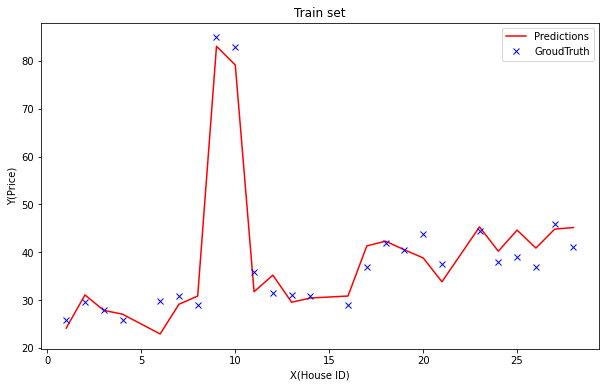

Degree: 1 Train set Mean squared error: 9.965765490618384
predictions: [27.05905998 26.68336902 44.51499097]


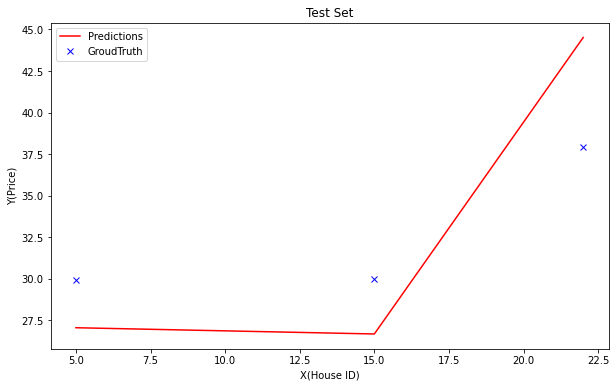

Degree: 1 Testset Mean squared error: 20.943028923973014


In [62]:
# Read files and load data
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]


def polynomial_regression(x_train, y_train, x_test, y_test, degree = 5, train_axis_x_value = [], test_axis_x_value = []):

  xArr ,yArr = x_train, y_train

  # list1, list2 = sorting(xArr[:,0],yArr)

  # xArr = np.array(list1).reshape(-1,1)
  # yArr = np.array(list2)

  X = xArr
  y = yArr

  m, n = X.shape

  # Add a bias factor to X.
  X = np.hstack((np.ones((m, 1)), X))

  if degree == 5:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
        (X[:, 1] ** 5).reshape((m, 1))
    ))
  elif degree == 4:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
        (X[:, 1] ** 4).reshape((m, 1)),
    ))
  elif degree == 3:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
        (X[:, 1] ** 3).reshape((m, 1)),
    ))
  elif degree == 2:
    X = np.hstack((
        X,
        (X[:, 1] ** 2).reshape((m, 1)),
    ))
  elif degree == 1:
    X = X

  print('x shape in pol :', X.shape)

  def h(X, theta):
    # another way return np.dot(X,  theta) 
    return X @ theta

  # print('X:', X)
  # Normal Equation
  theta = np.linalg.pinv(X.T @ X) @ X.T @ y

  
  predictions = h(X, theta)

  print('theta:', theta)


  plt.figure(figsize=(10, 6))
  plt.title('Train set')
  plt.plot(train_axis_x_value, predictions, label='Predictions', c='r')
  plt.plot(train_axis_x_value, y, 'bx', label='GroudTruth')
  plt.xlabel('X(House ID)')
  plt.ylabel('Y(Price)')
  plt.legend()
  plt.show()

  print("Degree:", degree, "Train set Mean squared error:", np.average((y - predictions) ** 2))

  # Test set 
  X = x_test
  y = y_test

  m, n = X.shape

  # Add a bias factor to X.
  X = np.hstack((np.ones((m, 1)), X))
  predictions = h(X, theta)

  print('predictions:', predictions)

  plt.figure(figsize=(10, 6))
  plt.title('Test Set')
  plt.plot(test_axis_x_value, predictions, label='Predictions', c='r')
  plt.plot(test_axis_x_value, y, 'bx', label='GroudTruth')
  plt.xlabel('X(House ID)')
  plt.ylabel('Y(Price)')
  plt.legend()
  plt.show()

  print("Degree:", degree, "Testset Mean squared error:", np.average((y - predictions) ** 2))


#########################################

# x_train = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/x_train.npy')
# x_test = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/x_test.npy')

# y_train = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/y_train.npy')
# y_test = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/y_test.npy')

# polynomial_regression(x_train, y_train, degree=5)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/Assignment1_Q2_Data.csv')

# divide dataset to train and test
msk = np.random.rand(len(dataset)) < 0.8
train_set = dataset[msk]
test_set = dataset[~msk]

# print(train_set.head())
# print(train_set.columns)

Train_House_ID = np.asarray(train_set.get('House ID')).reshape(-1,1)
train_set_Final_Price = np.asarray(train_set.get('Price (1000$)'))
train_set = train_set.drop("Price (1000$)", axis=1)
train_set = train_set.drop("House ID", axis=1)
train_set = train_set.drop("Construction type", axis=1)


# print(train_set.head())
print(train_set.columns)

Test_House_ID = np.asarray(test_set.get('House ID')).reshape(-1,1)
test_set_Final_Price = np.asarray(test_set.get('Price (1000$)'))
test_set = test_set.drop("Price (1000$)", axis=1)
test_set = test_set.drop("House ID", axis=1)
test_set = test_set.drop("Construction type", axis=1)

x_train = train_set
y_train = train_set_Final_Price

x_test = test_set
y_test = test_set_Final_Price

polynomial_regression(x_train, y_train, x_test, y_test, degree=1, train_axis_x_value = Train_House_ID, test_axis_x_value = Test_House_ID)



Question 3

Mounted at /content/gdrive/
len: 100 100


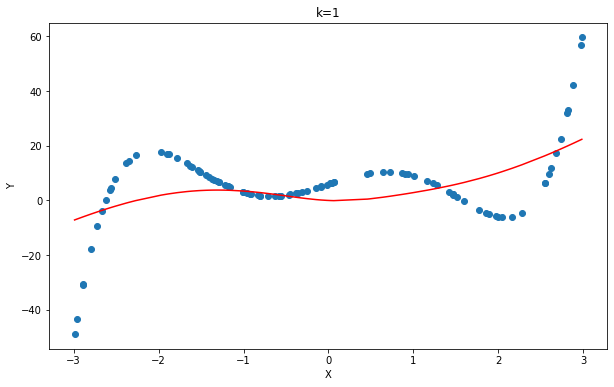

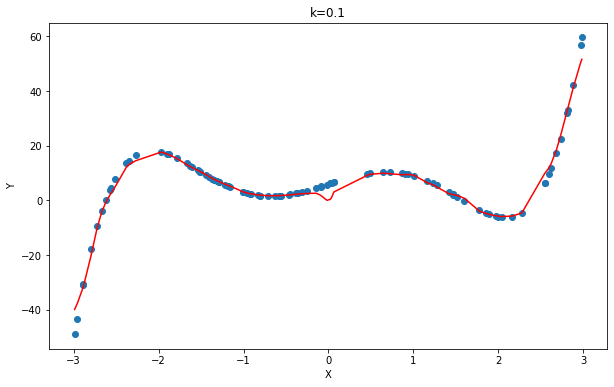

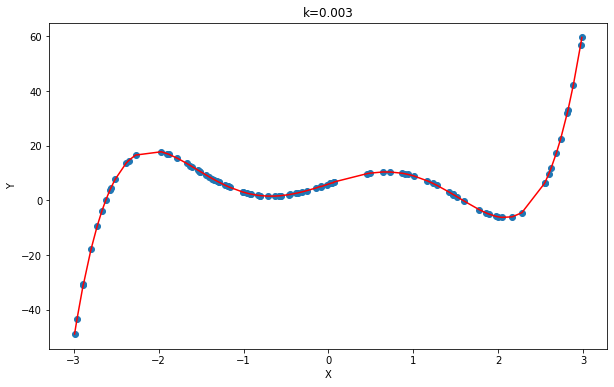

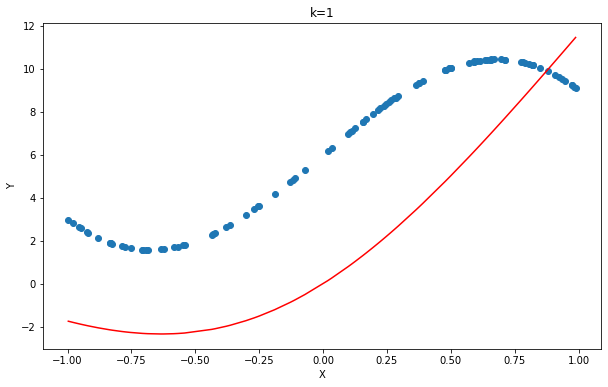

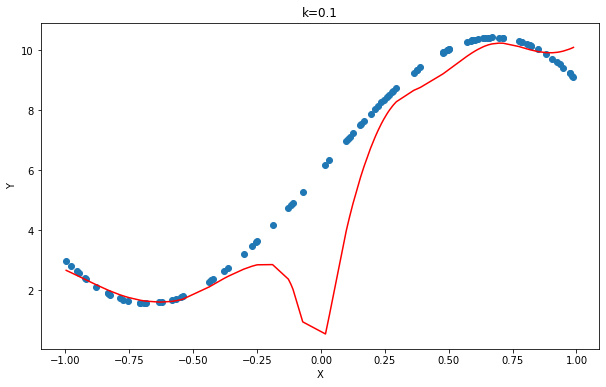

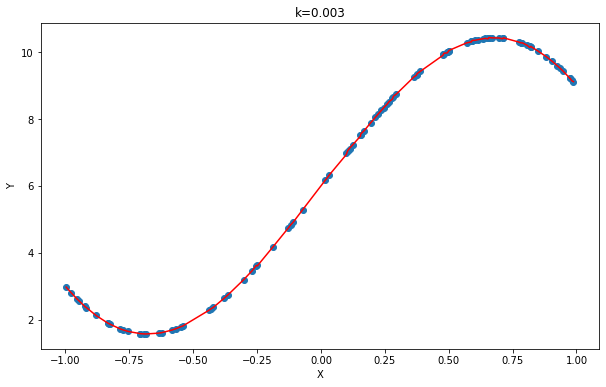

In [51]:
# Read files and load data
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

x_train = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/x_train.npy')
x_test = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/x_test.npy')

y_train = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/y_train.npy')
y_test = np.load('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment1/y_test.npy')


import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_linear_regression(xTest,xArr,yArr,k = 0.1):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    n = np.shape(xArr)[0]    
    yPredict = np.zeros(n)
    for point in range(n):

        w = np.mat(np.eye((n)))           

        for i in range(n):
            difMat = xTest[point,:] - xMat[i,:]
            w[i,i] = np.exp(difMat * difMat.T / (-2 * k * k))

        xTwx = xMat.T * (w * xMat)
        if np.linalg.det(xTwx) == 0: 
            print('can not get the inverse')
            return
        theta = xTwx.I * (xMat.T * (w * yMat))
        yPredict[point] = xTest[point,:] * theta     

    return yPredict

def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]

xArr ,yArr = x_train, y_train
xMat = np.mat(xArr)

X = xArr[:,0]
Y = yArr

list1, list2 = sorting(X,Y)

xArr = np.array(list1).reshape(-1,1)
yArr = np.array(list2)

print('len:',len(xArr), len(yArr))

xMat = np.mat(xArr)  

yP1 = locally_weighted_linear_regression(xMat,xArr,yArr,k=1)
yP2 = locally_weighted_linear_regression(xMat,xArr,yArr,k=0.1)
yP3 = locally_weighted_linear_regression(xMat,xArr,yArr,k=0.003)


plt.figure(figsize=(10,6))
plt.title('k=1')
plt.scatter(xArr, yArr)
plt.plot(xArr, yP1, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(figsize=(10,6))
plt.title('k=0.1')
plt.scatter(xArr, yArr)
plt.plot(xArr, yP2, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(figsize=(10,6))
plt.title('k=0.003')
plt.scatter(xArr, yArr)
plt.plot(xArr, yP3, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# test
xArr ,yArr = x_test, y_test
X = xArr[:,0]
Y = yArr

list1, list2 = sorting(X,Y)

xArr = np.array(list1).reshape(-1,1)
yArr = np.array(list2)

yArr = yArr[:,0]

xMat = np.mat(xArr)  


yP1 = locally_weighted_linear_regression(xMat,xArr, yArr,k=1)
yP2 = locally_weighted_linear_regression(xMat,xArr,yArr,k=0.1)
yP3 = locally_weighted_linear_regression(xMat,xArr,yArr,k=0.003)

plt.figure(figsize=(10,6))
plt.title('k=1')
plt.scatter(xArr, yArr)
plt.plot(xArr, yP1, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(figsize=(10,6))
plt.title('k=0.1')
plt.scatter(xArr, yArr)
plt.plot(xArr, yP2, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(figsize=(10,6))
plt.title('k=0.003')
plt.scatter(xArr, yArr)
plt.plot(xArr, yP3, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()